<a href="https://colab.research.google.com/github/jmh0411/Stats_SPR2025/blob/main/%EC%8A%A4%EC%BF%BC%ED%8A%B8_%EB%B6%84%EC%84%9D_%EC%BD%94%EB%93%9C%EC%9D%98_%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       타임코드         데이터       구간 속도
0  3.903900  170.726161         NaN
1  3.937267  169.175241  -46.481074
2  3.970633  167.253596  -57.591871
3  4.004000  162.327872 -147.623959
4  4.037367  159.833559  -74.754552


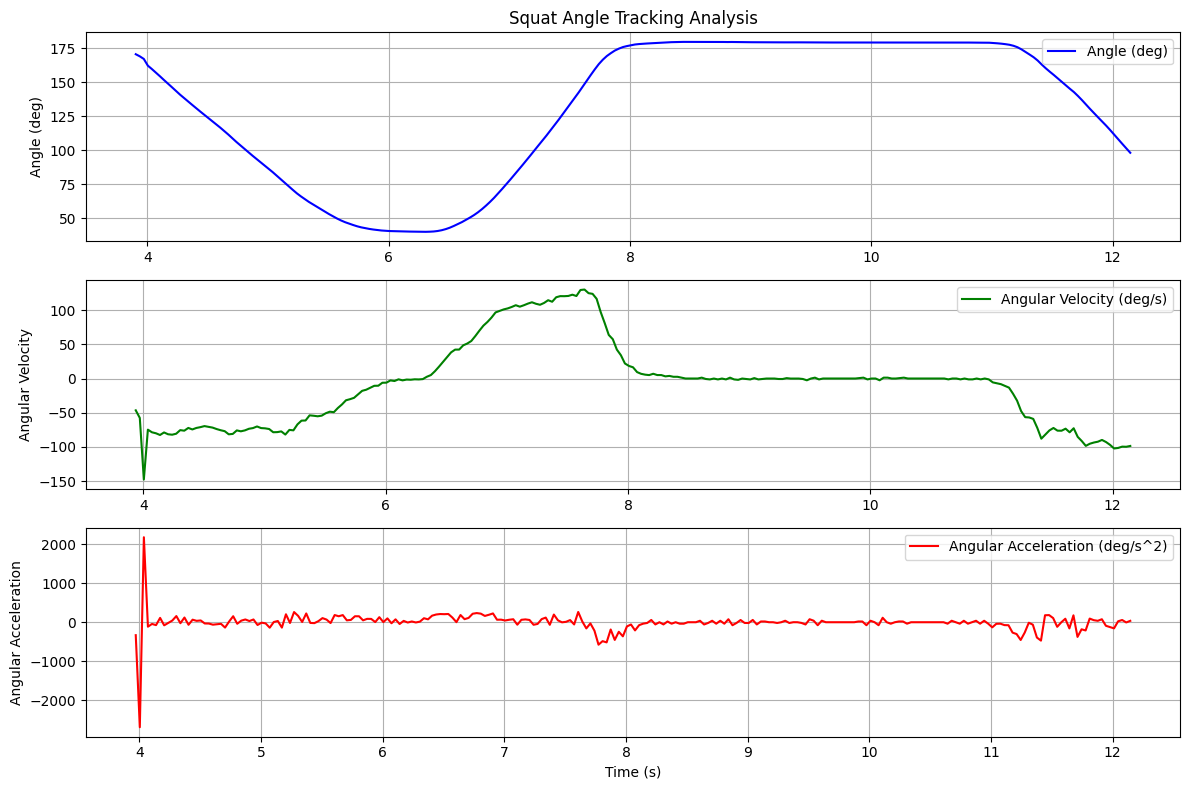

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = ('/content/스쿼트 데이터 파일.csv')
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep='\t')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='cp949', sep='\t')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(file_path, encoding='euc-kr', sep='\t')
        except UnicodeDecodeError:
            import chardet
            with open(file_path, 'rb') as f:
                result = chardet.detect(f.read())
            detected_encoding = result['encoding']
            df = pd.read_csv(file_path, encoding=detected_encoding, sep='\t')

# 데이터 확인
print(df.head())

# 열 이름 자동 정리 및 공백 제거
df.columns = [col.strip() for col in df.columns]

# 시간과 각도 열 자동 지정
time = df.iloc[:, 0].astype(float).values
angle = df.iloc[:, 1].astype(float).values

# 시간 간격(dt) 계산 (초 단위라고 가정)
dt = np.diff(time)

# 각속도(rad/s) 계산 (angle 단위가 deg이면 rad로 변환)
angle_rad = np.deg2rad(angle)
angular_velocity = np.diff(angle_rad) / dt  # rad/s

# 각가속도(rad/s^2) 계산
angular_acceleration = np.diff(angular_velocity) / dt[:-1]

# 시간 배열 맞추기
time_av = time[1:]  # 각속도 시점
time_aa = time[2:]  # 각가속도 시점

# 그래프 시각화
plt.figure(figsize=(12, 8))

# 각도
plt.subplot(3, 1, 1)
plt.plot(time, angle, label='Angle (deg)', color='blue')
plt.ylabel('Angle (deg)')
plt.title('Squat Angle Tracking Analysis')
plt.grid(True)
plt.legend()

# 각속도
plt.subplot(3, 1, 2)
plt.plot(time_av, np.rad2deg(angular_velocity), label='Angular Velocity (deg/s)', color='green')
plt.ylabel('Angular Velocity')
plt.grid(True)
plt.legend()

# 각가속도
plt.subplot(3, 1, 3)
plt.plot(time_aa, np.rad2deg(angular_acceleration), label='Angular Acceleration (deg/s^2)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Angular Acceleration')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


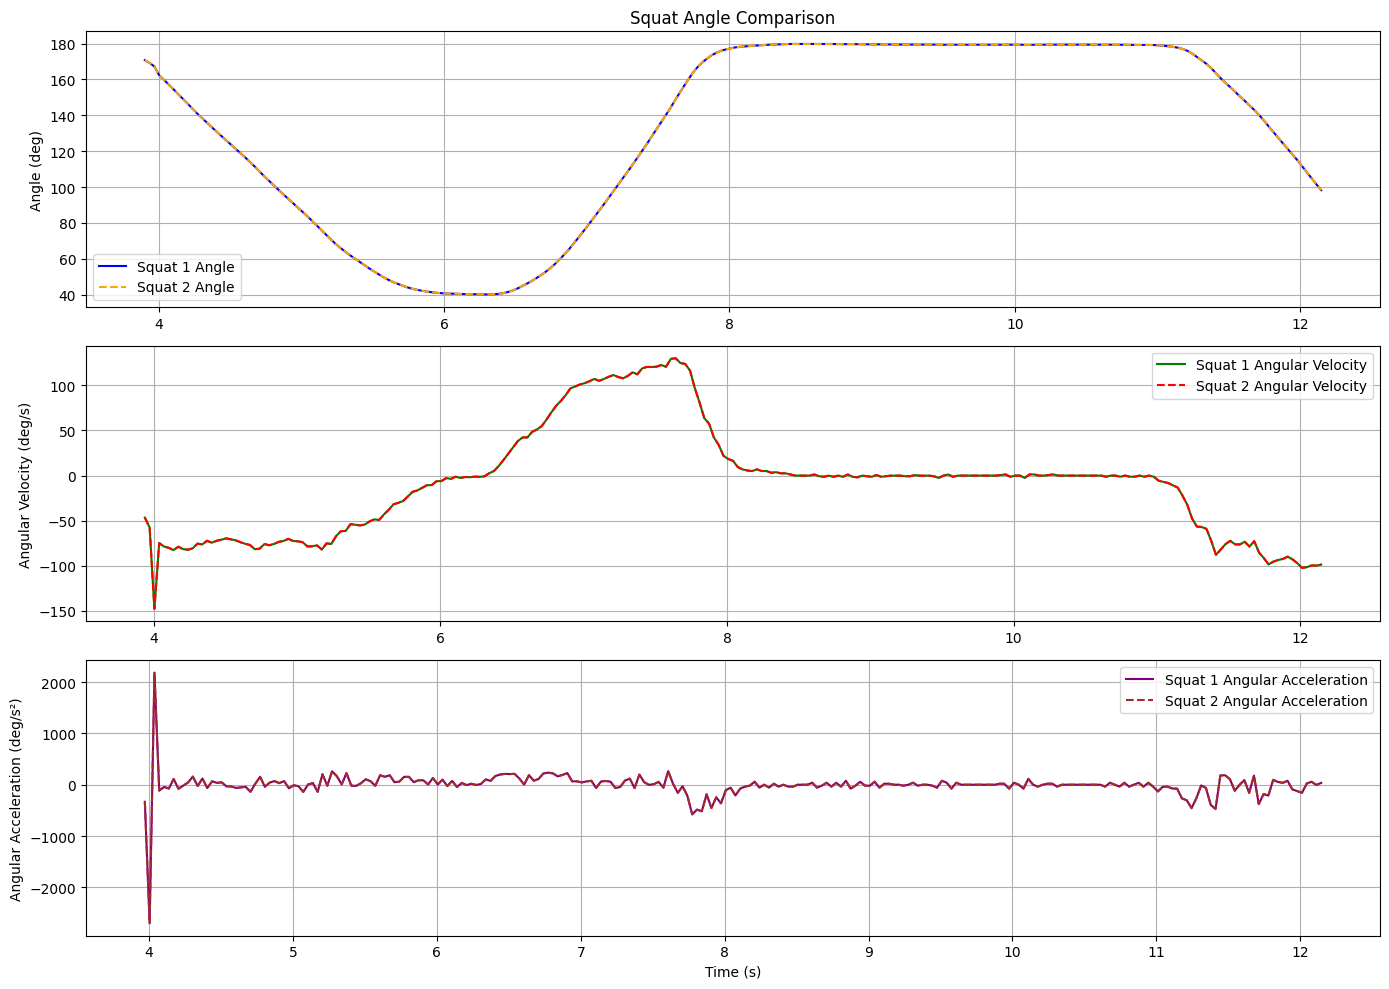

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet

# 파일 경로 설정
file1 = '/content/스쿼트 데이터 파일.csv'
file2 = '/content/스쿼트 데이터 파일.csv'

# 인코딩 자동 감지 함수
def load_csv_with_encoding(file_path):
    try:
        return pd.read_csv(file_path, encoding='utf-8', sep='\t')
    except UnicodeDecodeError:
        try:
            return pd.read_csv(file_path, encoding='cp949', sep='\t')
        except UnicodeDecodeError:
            with open(file_path, 'rb') as f:
                result = chardet.detect(f.read())
            return pd.read_csv(file_path, encoding=result['encoding'], sep='\t')

# 데이터 불러오기
df1 = load_csv_with_encoding(file1)
df2 = load_csv_with_encoding(file2)

# 열 이름 정리
df1.columns = [col.strip() for col in df1.columns]
df2.columns = [col.strip() for col in df2.columns]

# 시간과 각도 추출
time1 = df1.iloc[:, 0].astype(float).values
angle1 = df1.iloc[:, 1].astype(float).values
time2 = df2.iloc[:, 0].astype(float).values
angle2 = df2.iloc[:, 1].astype(float).values

# 시간 간격 계산
dt1 = np.diff(time1)
dt2 = np.diff(time2)

# 라디안으로 변환 후 각속도/각가속도 계산
angle_rad1 = np.deg2rad(angle1)
angle_rad2 = np.deg2rad(angle2)

angular_velocity1 = np.diff(angle_rad1) / dt1
angular_velocity2 = np.diff(angle_rad2) / dt2

angular_acceleration1 = np.diff(angular_velocity1) / dt1[:-1]
angular_acceleration2 = np.diff(angular_velocity2) / dt2[:-1]

# 시간 배열 맞추기
time_av1 = time1[1:]
time_aa1 = time1[2:]
time_av2 = time2[1:]
time_aa2 = time2[2:]

# 시각화
plt.figure(figsize=(14, 10))

# 각도 비교
plt.subplot(3, 1, 1)
plt.plot(time1, angle1, label='Squat 1 Angle', color='blue')
plt.plot(time2, angle2, label='Squat 2 Angle', color='orange', linestyle='--')
plt.ylabel('Angle (deg)')
plt.title('Squat Angle Comparison')
plt.grid(True)
plt.legend()

# 각속도 비교
plt.subplot(3, 1, 2)
plt.plot(time_av1, np.rad2deg(angular_velocity1), label='Squat 1 Angular Velocity', color='green')
plt.plot(time_av2, np.rad2deg(angular_velocity2), label='Squat 2 Angular Velocity', color='red', linestyle='--')
plt.ylabel('Angular Velocity (deg/s)')
plt.grid(True)
plt.legend()

# 각가속도 비교
plt.subplot(3, 1, 3)
plt.plot(time_aa1, np.rad2deg(angular_acceleration1), label='Squat 1 Angular Acceleration', color='purple')
plt.plot(time_aa2, np.rad2deg(angular_acceleration2), label='Squat 2 Angular Acceleration', color='brown', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Angular Acceleration (deg/s²)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()